In [1]:
import pandas
import matplotlib.pyplot

In [2]:
addr = pandas.read_csv('../Data/Address/Managable.log', header=None)

Separate latitude and longitude fields, add column names

In [3]:
latlong = addr[1].str.split(" ", n = 1, expand = True )

In [4]:
addr[1] = latlong[0]
addr[2] = latlong[1]

In [5]:
addr.columns = ['Address','Longitude','Latitude']

In [6]:
addr.head(5)

,Address,Longitude,Latitude
0,7401 SPRING RAY DR,-97.591108176711,30.149476996462
1,6413 OWL CREEK LN,-97.760721473633,30.136337038571
2,15405 SOLSTICE CV,-97.593175999501,30.147669821873
3,10307 SENTINEL DR,-97.760326156633,30.135921382446
4,7400 TRAVERTINE SPRING,-97.724694565891,30.157609127377


In [7]:
addr.tail(5)

,Address,Longitude,Latitude
411645,13709 GLEN MARK DR,-97.542785176481,30.358669731534
411646,8017 BESTRIDE BND,-97.720919900453,30.151216883843
411647,103 HOOPES AVE,-97.622085155348,30.43713511396
411648,6505 LOHMANS FORD RD,-97.980200732084,30.457599104198
411649,3120 WHEELER ST,-97.740494911821,30.298151161602


In [8]:
addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411650 entries, 0 to 411649
Data columns (total 3 columns):
Address      411650 non-null object
Longitude    411650 non-null object
Latitude     411650 non-null object
dtypes: object(3)
memory usage: 9.4+ MB


In [9]:
print(addr.describe())

           Address         Longitude         Latitude
count       411650            411650           411650
unique      400794            411648           411648
top     601 5TH ST  -97.610291271624  30.467455663856
freq             5                 2                2


In [10]:
addr.describe()

,Address,Longitude,Latitude
count,411650,411650,411650
unique,400794,411648,411648
top,601 5TH ST,-97.610291271624,30.467455663856
freq,5,2,2


In [11]:
# Select all duplicate rows based on one column
duplicateAddr = addr[addr.duplicated(['Address'])]
 
print("Duplicate Entries based on a Address are:", duplicateAddr, sep='\n')

Duplicate Entries based on a Address are:
                         Address         Longitude         Latitude
124           7428 SPRING RAY DR  -97.592751560956  30.148514375679
147     15309 GRENADINE BLOOM CV  -97.594665487124  30.147724326959
194          7501 IVY TRELIS TRL  -97.591711332808  30.146904370699
654            8801 CONGRESS AVE  -97.787122053585   30.16963395349
656            8800 CONGRESS AVE  -97.787802646013  30.169707252681
711        404 RALPH ABLANEDO DR  -97.792340867935  30.174426798443
774       115 SANDRA MURAIDA WAY   -97.75496481182  30.267650683131
794             140 SLAUGHTER LN  -97.790471265971  30.167427277804
816              9153 SWANSON LN  -97.795525840902  30.170083392697
830            8900 CONGRESS AVE   -97.78834406617  30.169242201467
953               8916 CULLEN LN  -97.791050371129  30.167578487055
958               9415 CULLEN LN  -97.791425907849  30.163632525687
975                  8904 1ST ST  -97.799144656896  30.173754555629
996   

In [12]:
#Check to see if detection correct
addr.loc[addr['Address'] == '7428 SPRING RAY DR']

,Address,Longitude,Latitude
55,7428 SPRING RAY DR,-97.592673043409,30.14850899268
124,7428 SPRING RAY DR,-97.592751560956,30.148514375679


In [13]:
#Check to see if detection correct
print(addr.loc[addr['Address'] == '7428 SPRING RAY DR'])

                Address         Longitude         Latitude
55   7428 SPRING RAY DR  -97.592673043409   30.14850899268
124  7428 SPRING RAY DR  -97.592751560956  30.148514375679


In [14]:
#plot scatter plot of duplicates
duplicateAddr.dtypes  #can't plot object types
duplicateAddr["Longitude"] = duplicateAddr.Longitude.astype(float)
duplicateAddr["Latitude"] = duplicateAddr.Latitude.astype(float)
#duplicateAddr.plot.scatter(x='Latitude',y='Longitude')

/home/leebhinkle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/leebhinkle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
duplicateAddr.dtypes  #can't plot object types

Address       object
Longitude    float64
Latitude     float64
dtype: object

In [17]:
miniAddr = duplicateAddr.head(100)

In [18]:
miniAddr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 124 to 25051
Data columns (total 3 columns):
Address      100 non-null object
Longitude    100 non-null float64
Latitude     100 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


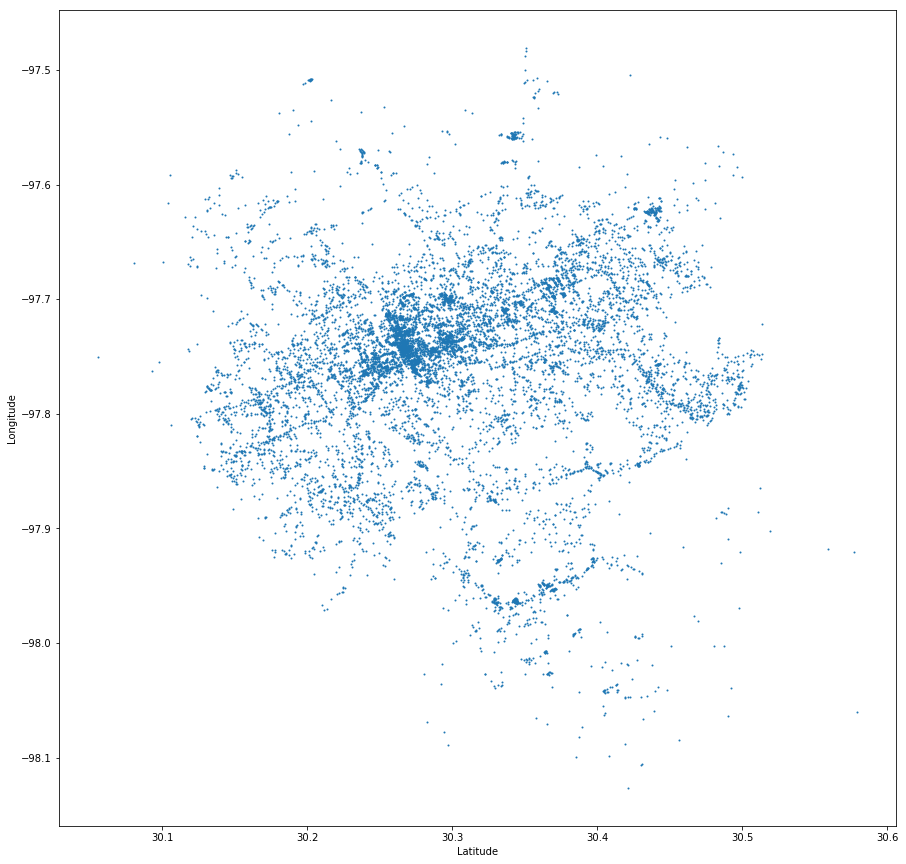

In [31]:
ax1 = duplicateAddr.plot.scatter(x='Latitude',y='Longitude', s=1,figsize=(15,15))  #have to have matlotlib.pyplot and call .show() for visibility
matplotlib.pyplot.show()